<p style ="text-align:center">
    <img src="http://epecora.com.br/DataFiles/BannerUFPR.png" width="700" alt="PPGOLD/PPGMNE Python:INTRO"  />
</p>


# SAOP09 - Data Science For Business
## Prof. Eduardo Pécora

## Tarefa
Executar os algoritmos de classificação SVM, ADABOOST e Random forests.

* Usar a mesma separação de variáveis teste e treino.
* Calcular a acuracidade Dica: Usar ```accuracy_score``` e ```classification_report```.
* Encontrar os melhores hyper-parâmetros para cada modelo.
* Gerar a matrix de confusão final.
* Escrever uma breve análise do resultado.

## Objetivos

Após completar esta aula, você será capaz de:

* Usar outros algoritmos de classificação
* Interpretar uma Curva ROC
* Calcular e interpretar os indicadores de um modelo de classificação


# Importar bibliotecas e ler os dados

In [2]:
# check Python version
!python -V

import pandas as pd # download library to read data into dataframe
import numpy as np # import numpy library
import matplotlib.pyplot as plt # plots
import collections
import random # library for random number generation
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Data read into dataframe!") # takes about 30 seconds

file_path = "https://raw.githubusercontent.com/EduPekUfpr/PythonProject/refs/heads/main/Dados/Distribution_12k.csv"

starsData = pd.read_csv(file_path)
starsData.head()

Python 3.10.14
Data read into dataframe!


,Stars,Product,Origin,CD_name,Dest,DistanceTravelled_Fac_CD,TruckType,DriverF_CD,DaysStocked,FloorCD,DistanceTravelled_CD_Client,TruckType2,DriverCD_C,RoutDeliveryOrder
0,4.0,P6,F4,CD2,C203,162,SemiTrailler,D05,37,2,59.7,CityDeliveryTruck,D2_2,2
1,1.0,P2,F3,CD2,C202,162,SemiTrailler,D06,5,0,94.2,MiniVan,D2_4,3
2,5.0,P6,F3,CD2,C202,162,SemiTrailler,D04,27,0,30.9,Van,D2_7,1
3,2.0,P9,F3,CD2,C202,162,SemiTrailler,D03,14,0,89.7,Van,D2_7,3
4,5.0,P9,F2,CD3,C305,58,Truck,D03,30,1,171.7,Van,D3_2,6


# Preparação do DataFrame



In [34]:
# fix name of the column displaying the Stars
column_names = starsData.columns.values
column_names[0] = "stars"
starsData.columns = column_names

# Limpa dados errados
starsData = starsData[(starsData["stars"] <= 5) & (starsData["stars"] >= 1)]

starsData = starsData.reset_index(drop=True) # É importante refazer o indice do dataFrame, apeos excluir linhas, pois pode gerar problema no SciKit Learn

# Separar o dataFrame em variáveis dependentes e independentes

stars = starsData["stars"] # Só a coluna "stars"

stars_class = stars[:]
variables = starsData.iloc[:,1:] # Todas as outras colunas com exceção da "stars"

# Adequação das variáveis categóricas em colunas binárias - OneHotEncoder

# conseguindo todas as colunas categóricas
cat = [i for i in variables.columns if variables[i].dtypes == "O"]

# excluindo DriverF_CD
cat.remove('DriverF_CD')

cat_one_hot_list = []
for i in cat:
    cat_one_hot_list.append(pd.get_dummies(variables[[i]])) #get_dummies transforma categorias em colunas e codifica binariamente

cat_one_hot_list.append(variables["RoutDeliveryOrder"])
cat_one_hot_list.append(variables["FloorCD"])

var1 = pd.concat(cat_one_hot_list, axis=1) #concatenando horizontamente

#stars_class.loc[stars <= 2] = "bad"
#stars_class.loc[stars == 3] = "average"
#stars_class.loc[stars >= 4] = "excelent"

In [35]:
# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(var1, stars_class, test_size=0.25, random_state=42)

# Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
# utilizamos os dois principais parametros deste método
# n_estimators é a quantidade de arvores de decisão
# max_depth é a profundidade máxima das arvores de decisão
param_grid_rf = {'n_estimators':[500,1000,1500],'max_depth':[20,25,30]}

In [38]:
# Initialize random forest
rf = RandomForestClassifier(n_jobs=-1, random_state=0) # n_jobs permite processamento paralelo, random_state para que o modelo não mude (modelo baseado em aleatóriedade)

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             param_grid={'max_depth': [20, 25, 30],
                         'n_estimators': [500, 1000, 1500]},
             scoring='accuracy', verbose=1)

In [39]:
print(f'Best cross-validation accuracy: {grid_search.best_score_}')
print(f'Best cross-validation parameters: {grid_search.best_params_}')

Best cross-validation accuracy: 0.9295331161780673
Best cross-validation parameters: {'max_depth': 20, 'n_estimators': 500}


In [40]:
param_rf = grid_search.best_params_
print(param_rf)

#modelo com os parametros ótimos
rf_model = RandomForestClassifier(n_estimators=param_rf['n_estimators'],max_depth=param_rf['max_depth'],n_jobs=-1, random_state=0)

{'max_depth': 20, 'n_estimators': 500}


# Support Vector Machines

In [41]:
from sklearn.svm import SVC

In [42]:
#Variamos somente a coeficiente de regularização dada a demora do método
param_grid_svm = {'C':[1,10,100,1000]}

In [43]:
# Initialize svm
svc = SVC(random_state=0)

# Perform grid search with cross-validation
grid_search = GridSearchCV(svc, param_grid_svm, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=SVC(random_state=0),
             param_grid={'C': [1, 10, 100, 1000]}, scoring='accuracy',
             verbose=1)

In [44]:
print(f'Best cross-validation accuracy: {grid_search.best_score_}')
print(f'Best cross-validation parameters: {grid_search.best_params_}')

Best cross-validation accuracy: 0.9299674267100977
Best cross-validation parameters: {'C': 1000}


In [45]:
param_svm = grid_search.best_params_

#modelo com os parametros ótimos
svm_model = SVC(C=param_svm['C'], random_state=0)

# Adaptative Boosting Classifier

In [46]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier # utiliza arvores de decisão como base do ensemble

In [49]:
#Como método é muito mais lento vamos usar ois parametros do rf
param_grid_ada = {'estimator':[DecisionTreeClassifier(max_depth=25)], #base_estimator (v1.1 ou before), estimator in v1.2 or higher
                  'n_estimators':[1000]} 

In [50]:
# Initialize Lrandom forest
ada = AdaBoostClassifier(random_state=0)

# Perform grid search with cross-validation
grid_search = GridSearchCV(ada, param_grid_ada, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/pecorajr/anaconda3/envs/ppgold/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/pecorajr/anaconda3/envs/ppgold/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/pecorajr/anaconda3/envs/ppgold/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/pecorajr/anaconda3/envs/ppgold/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be r

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=0),
             param_grid={'estimator': [DecisionTreeClassifier(max_depth=25)],
                         'n_estimators': [1000]},
             scoring='accuracy', verbose=1)

In [51]:
print(f'Best cross-validation accuracy: {grid_search.best_score_}')
print(f'Best cross-validation parameters: {grid_search.best_params_}')

Best cross-validation accuracy: 0.9317046688382193
Best cross-validation parameters: {'estimator': DecisionTreeClassifier(max_depth=25), 'n_estimators': 1000}


In [54]:
param_ada = grid_search.best_params_

#modelo com os parametros ótimos
ada_model = AdaBoostClassifier(estimator=param_ada['estimator'],n_estimators=param_ada['n_estimators'], random_state=0)

# Resultados Modelos Treinados

In [55]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=500, n_jobs=-1,
                       random_state=0)

In [56]:
svm_model.fit(X_train, y_train)

SVC(C=1000, random_state=0)

In [57]:
ada_model.fit(X_train, y_train)

/Users/pecorajr/anaconda3/envs/ppgold/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=25),
                   n_estimators=1000, random_state=0)

In [58]:
pred_rf = rf_model.predict(X_test)
pred_svm = svm_model.predict(X_test)
pred_ada = ada_model.predict(X_test)

In [59]:
print(f'Random Forest accuracy: {accuracy_score(y_test,pred_rf)}')
print(f'SVM accuracy: {accuracy_score(y_test,pred_svm)}')
print(f'AdaBoost accuracy: {accuracy_score(y_test,pred_ada)}')

Random Forest accuracy: 0.9661348095083034
SVM accuracy: 0.9664604363399544
AdaBoost accuracy: 0.9667860631716053


In [60]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

         1.0       0.99      0.95      0.97       566
         2.0       0.97      0.96      0.97       593
         3.0       0.94      0.98      0.96       704
         4.0       0.98      0.96      0.97       622
         5.0       0.96      0.98      0.97       586

    accuracy                           0.97      3071
   macro avg       0.97      0.97      0.97      3071
weighted avg       0.97      0.97      0.97      3071



In [61]:
print(classification_report(y_test,pred_svm))

              precision    recall  f1-score   support

         1.0       0.98      0.94      0.96       566
         2.0       0.95      0.97      0.96       593
         3.0       0.95      0.98      0.97       704
         4.0       0.98      0.96      0.97       622
         5.0       0.97      0.98      0.98       586

    accuracy                           0.97      3071
   macro avg       0.97      0.97      0.97      3071
weighted avg       0.97      0.97      0.97      3071



In [62]:
print(classification_report(y_test,pred_ada))

              precision    recall  f1-score   support

         1.0       0.98      0.95      0.96       566
         2.0       0.98      0.96      0.97       593
         3.0       0.95      0.98      0.96       704
         4.0       0.97      0.96      0.96       622
         5.0       0.96      0.98      0.97       586

    accuracy                           0.97      3071
   macro avg       0.97      0.97      0.97      3071
weighted avg       0.97      0.97      0.97      3071



In [63]:
from sklearn.metrics import ConfusionMatrixDisplay

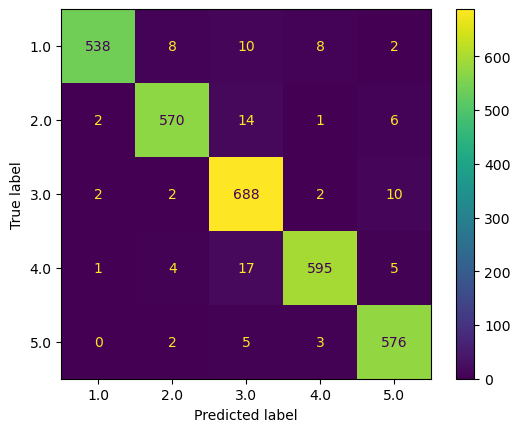

In [64]:
cf_matrix_rf = confusion_matrix(y_test,pred_rf, labels=rf_model.classes_)
ConfusionMatrixDisplay(confusion_matrix=cf_matrix_rf,
                       display_labels=rf_model.classes_).plot()

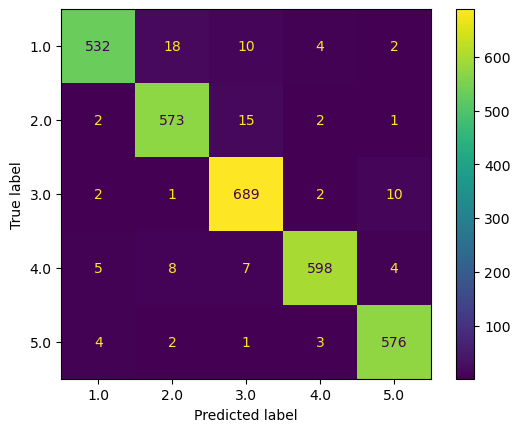

In [65]:
cf_matrix_svm = confusion_matrix(y_test,pred_svm, labels=svm_model.classes_)
ConfusionMatrixDisplay(confusion_matrix=cf_matrix_svm,
                       display_labels=svm_model.classes_).plot()

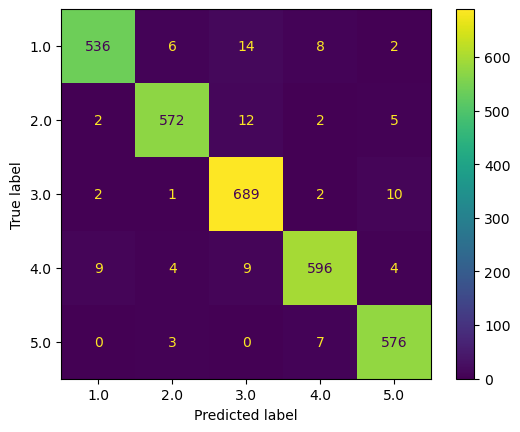

In [66]:
cf_matrix_ada = confusion_matrix(y_test,pred_ada, labels=ada_model.classes_)
ConfusionMatrixDisplay(confusion_matrix=cf_matrix_ada,
                       display_labels=ada_model.classes_).plot()

## Fique Conectado

- [![YouTube](https://img.icons8.com/ios-filled/40/000000/youtube-play.png)](https://www.youtube.com/@LigaDataScience/videos)  
  Explore nossos vídeos educacionais e webinars sobre ciência de dados, machine learning e inteligência artificial. Inscreva-se para não perder nenhuma atualização!

- [![LinkedIn](https://img.icons8.com/ios-filled/40/000000/linkedin.png)](https://www.linkedin.com/company/liga-data-science-ufpr/)  
  Siga-nos no LinkedIn para as últimas novidades, oportunidades de carreira e networking profissional no campo da ciência de dados.

- [![Instagram](https://img.icons8.com/ios-filled/40/000000/instagram-new.png)](https://www.instagram.com/ligadatascience/)  
  Confira nosso Instagram para conteúdos dos bastidores, destaques de eventos e o dia a dia da Liga Data Science. Faça parte da nossa jornada!

## Autores

<a href="https://www.linkedin.com/in/eduardopecora/" target="_blank">Eduardo Pecora</a>

<a href="https://www.linkedin.com/in/joão-gabriel-santin-botelho/" target="_blank">João Gabriel</a>

## Log de modificações

| Data | Versão | Modificado por | Descrição |
| ----------------- | ------- | ---------- | ---------------------------------- |
| 28-05-2024       | 1.0     | Eduardo Pecora    | Inicial               |
| 17-10-2024       | 1.1     | João Gabriel    | Demonstração dos modelos               |

<hr>

&copy; Liga Data Science 2024